# Prodigy InfoTech 
## Task 02 - Customer Segmentation using K Means Clustering
#### SUBMITTED BY: Shreya R

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


1. IMPORT DATASET

In [7]:
cust_data= pd.read_csv('Mall_Customers.csv')

2. DATA PREPROCESSING & DATA ANALYSIS

In [8]:
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
cust_data.shape

(200, 5)

In [16]:
cust_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [25]:
#choosing annual income column and spending score column
X= cust_data.iloc[:,3:].values

# x axis = annual income
# y axis = spending score

3. CALCULATING NUMBER OF CLUSTERS

WCSS - Within clusters, sum of squares

In [28]:
#finding wcss value for different number of clusters

wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

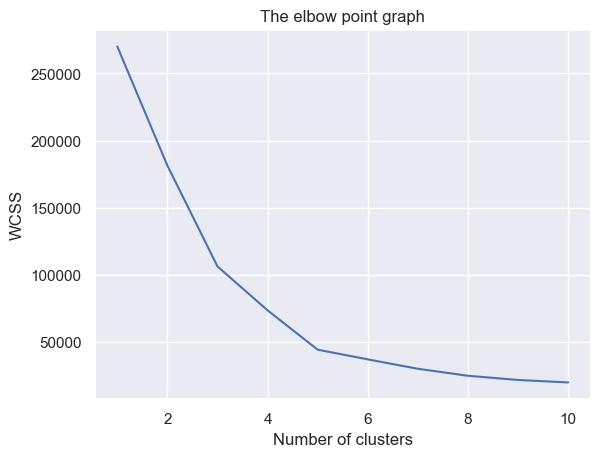

In [30]:
#plotting an elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The elbow point graph")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow point, 5, after which we see no significant drop. Hence, 5 is the optimum number of cluster

4. K MEANS CLUSTERING

In [39]:
#Training the unsupervised clustering model
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=38)

#return a label for each datapoint based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


5. CLUSTER VISUALISATION

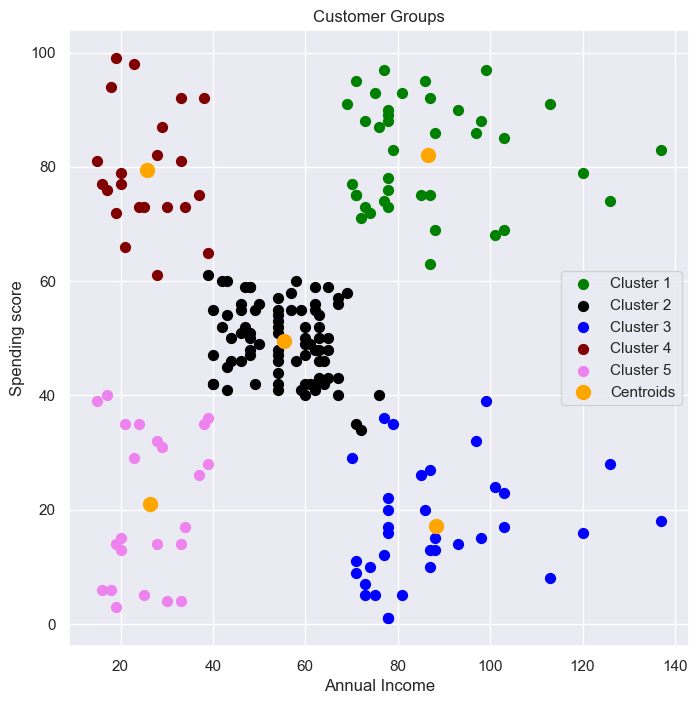

In [46]:
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0] ,X[Y==0,1], s=50, c='green',label='Cluster 1' )
plt.scatter(X[Y==1,0] ,X[Y==1,1], s=50, c='black',label='Cluster 2' )
plt.scatter(X[Y==2,0] ,X[Y==2,1], s=50, c='blue',label='Cluster 3' )
plt.scatter(X[Y==3,0] ,X[Y==3,1], s=50, c='maroon',label='Cluster 4' )
plt.scatter(X[Y==4,0] ,X[Y==4,1], s=50, c='violet',label='Cluster 5' )

#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='orange',label="Centroids")

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.legend()
plt.show()